# Interpolação por Spline Cúbica

A interpolação spline cúbica é método usado para criar uma função por partes, função matemática que é composta por diferentes expressões em diferentes intervalos do domínio. Os intervalos nesse casos são definidos a partir do conjunto de dados organizados em ordem crescente nesses intervalos construimos uma função polinomial de terceiro grau para representação os valores entre seus limites.

## Definição

Dados um conjuntos de $n$ pontos de dados $(x_{i},y_{i})$ onde $x_{0}<x_{1}<\cdots<x_{n-2}<x_{n-1}$ a spline cúbica $S(x)$ é uma função no formanto:

$S(x)=\begin{cases}
s_{0} = a_{0}+b_{0}(x-x_{0})+c_{0}(x-x_{0})^{2}+d_{0}(x-x_{0})^{3} & x_{0}\leq x \leq x_{1} \\
\vdots & \vdots \\
s_{i} = a_{i}+b_{i}(x-x_{i})+c_{i}(x-x_{i})^{2}+d_{i}(x-x_{i})^{3} & x_{i-1}\leq x \leq x_{i} \\
\vdots & \vdots \\
s_{n-2} = a_{n-2}+b_{n-2}(x-x_{n-2})+c_{n-2}(x-x_{n-2})^{2}+d_{n-2}(x-x_{n-2})^{3} & x_{n-2}\leq x \leq x_{n-1}
\end{cases}
$

São condições de contorno para sua existência:

|Ponto|Condição - 01|Condição - 02|Condição - 03|Condição - 04|
|:-:|:-:|:-:|:-:|:-:|
|$0$|$S_{0}(x_{0}) = y_{0}$|$S_{0}(x_{1}) = y_{1}$|$S_{0}^{'}(x_{1}) = S_{1}^{'}(x_{1})$|$S_{0}^{''}(x_{1}) = S_{1}^{''}(x_{1})$|
|$1$|$S_{1}(x_{1}) = y_{1}$|$S_{1}(x_{2}) = y_{2}$|$S_{1}^{'}(x_{2}) = S_{2}^{'}(x_{2})$|$S_{1}^{''}(x_{2}) = S_{2}^{''}(x_{2})$|
|$\vdots$|$\vdots$|$\vdots$|$\vdots$|$\vdots$|
|$i-1$|$S_{i-1}(x_{i-1}) = y_{i-1}$|$S_{i-1}(x_{i}) = y_{i}$|$S_{i-1}^{'}(x_{i}) = S_{i}^{'}(x_{i})$|$S_{i-1}^{''}(x_{i}) = S_{i}^{''}(x_{i})$|
|$i$|$S_{i}(x_{i}) = y_{i}$|$S_{i}(x_{i+1}) = y_{i+1}$|$S_{i}^{'}(x_{i+1}) = S_{i+1}^{'}(x_{i+1})$|$S_{i}^{''}(x_{i+1}) = S_{i+1}^{''}(x_{i+1})$|
|$i+1$|$S_{i+1}(x_{i+1}) = y_{i+1}$|$S_{i+1}(x_{i+2}) = y_{i+2}$|$S_{i+1}^{'}(x_{i+2}) = S_{i+2}^{'}(x_{i+2})$|$S_{i+1}^{''}(x_{i+2}) = S_{i+2}^{''}(x_{i+2})$|
|$\vdots$|$\vdots$|$\vdots$|$\vdots$|$\vdots$|
|$n-3$|$S_{n-3}(x_{n-3}) = y_{n-3}$|$S_{n-3}(x_{n-2}) = y_{n-2}$|$S_{n-3}^{'}(x_{n-2}) = S_{n-2}^{'}(x_{n-2})$|$S_{n-3}^{''}(x_{n-2}) = S_{n-2}^{''}(x_{n-2})$|
|$n-2$|$S_{n-2}(x_{n-2}) = y_{n-2}$|$S_{n-2}(x_{n-1}) = y_{n-1}$|----|----|
|$n-1$|----|----|----|----|

Quando temos $n$ pontos a spline e composta por $n-1$ equações cada equação que compõem a spline apresentam quatro paramêtros, assim temos um total de $4(n-1)=4n-4$ paramêtros para conseguimos determinar a spline. As quatro condições impostas nos fornecem um total de $2(n-1)+2(n-2)=4n-6$ relações entre as equações. Observamos que $4n-4 \neq 4n-6$, assim não temos como determinar todos os paramêtros, isso nos deixa com a necessidade de determinar mais duas relações. Por isso impomos um das seguintes condições de fronteira:

1. As derivadas nos pontos finais são conhecidas, condições de contorno fixada.
   > $s_{0}^{'}(x_{0})=k_{1}$ e $s_{n-2}^{'}(x_{n-1})=k_{2}$
2. As segundas derivadas nos pontos finais são conhecidas, quando $s_{0}^{''}(x_{0})=s_{n-1}^{''}(x_{n-1})=0$ chamamos de condição de contorno natural ou simples
   > $s_{0}^{''}(x_{0})=k_{1}$ e $s_{n-2}^{''}(x_{n-1})=k_{2}$

Quando dispomosd de uma dessas condições possuímos o número toda de equações para determinar a spline, longe disso somos capazas de elaborar outras condições de fronteiras para obtermos outros modelos de interpolação que solucionar essa modelagem em questão.

**Referências**
* [Interpolação cúbica segmentada - spline](https://www.ufrgs.br/reamat/CalculoNumerico/livro-py/i1-interpolacao_cubica_segmentada_-_spline.html)
* [Cubic Spline Interpolation](https://en.wikiversity.org/wiki/Cubic_Spline_Interpolation)
* [Interpolaçõa Polinomial Splines Cúbicos](https://www.ime.usp.br/mat/2458/textos/splines.pdf)

## Observação

Destamos que poderiamos recorrer diretamente a biblioteca [scipy](https://scipy.org/) por contém o método [`scipy.interpolate.CubicSpline`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.CubicSpline.html) que opera diretamente com esse método de interpolação. Recorre o scipy para modelagem desse tipo de interpolação se mostra muito mais eficiente em diverso níveis, diverso modelos de spline e velocidade no processamento, esse notebook trata somente de uma dos métodos de interpolação por Spline Cúbica de condição natural.

# Módulos

Desenvolveremos módulos interconectados que poderão realizar interpolação por spline cúbica.

## Condições

In [96]:
def condicao_um (x = []):
    '''
    Gera os coeficientes da primeira condição para determinar as subfunções da spline.
    
    Parâmetros:
        x (list): Lista das abscissas dos pontos para determinar a spline.
      
    Retorna:
        list: Uma lista de listas, onde cada sublista contém os coeficientes para montar a matriz de solução do sistema.
    '''
    # Numeros de equações
    quantidade_de_equacoes = len(x) - 1

    # Coeficientes
    coeficientes = []

    #Gerar os coeficientes de cada subfunção da função por parte
    j = 0
    for _ in range(quantidade_de_equacoes):
        k = [0 for _ in range(4*quantidade_de_equacoes)]
        k[j] = 1
        j += 4
        coeficientes.append(k)
        
    return coeficientes

In [97]:
condicao_um([-5,-1,3])

[[1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0]]

In [98]:
def condicao_dois(x = []):
    '''
    Gera os coeficientes da segunda condição para determinar as subfunções da spline.
    
    Parâmetros:
        x (list): Lista das abscissas dos pontos para determinar a spline.
      
    Retorna:
        list: Uma lista de listas, onde cada sublista contém os coeficientes para montar a matriz de solução do sistema.
    '''
    # Numeros de equações
    quantidade_de_equacoes = len(x) - 1

    # Coeficientes
    coeficientes = []
    
    #Gerar os coeficientes de cada subfunção da função por parte
    i,j = 0,0
    for _ in range(quantidade_de_equacoes):
        k = [0 for elemento in range(4*quantidade_de_equacoes)]
        k[j]  = 1
        k[j+1] = x[i+1] - x[i]
        k[j+2] = (x[i+1] - x[i])**2
        k[j+3] = (x[i+1] - x[i])**3
        coeficientes.append(k)
        j += 4
        i += 1

    return coeficientes

In [99]:
condicao_dois([-5,-1,3])

[[1, 4, 16, 64, 0, 0, 0, 0], [0, 0, 0, 0, 1, 4, 16, 64]]

In [100]:
def condicao_tres(x = []):
    '''
    Gera os coeficientes da terceira condição para determinar as subfunções da spline.
    
    Parâmetros:
        x (list): Lista das abscissas dos pontos para determinar a spline.
      
    Retorna:
        list: Uma lista de listas, onde cada sublista contém os coeficientes para montar a matriz de solução do sistema.
    '''
    # Numeros de equações
    quantidade_de_equacoes = len(x) - 1

    # Coeficientes
    coeficientes = []

    # Gerar os coeficientes de cada uma das primeira derivadas das subfunção da função por parte
    i,j = 0, 0
    for _ in range(quantidade_de_equacoes-1):
        k = [0 for i in range(4*quantidade_de_equacoes)]
        k[j + 1] = 1
        k[j + 2] = 2*(x[i+1]-x[i])
        k[j + 3] = 3*(x[i+1]-x[i])**2
        k[j + 5] = -1
        
        coeficientes.append(k)
        j += 4
        i += 1

    return coeficientes

In [101]:
condicao_tres([-2,0,2])

[[0, 1, 4, 12, 0, -1, 0, 0]]

In [102]:
def condicao_quatro(x = []):
    '''
    Gera os coeficientes da quarta condição para determinar as subfunções da spline.
    
    Parâmetros:
        x (list): Lista das abscissas dos pontos para determinar a spline.
      
    Retorna:
        list: Uma lista de listas, onde cada sublista contém os coeficientes para montar a matriz de solução do sistema.
    '''
    # Numeros de equações
    quantidade_de_equacoes = len(x) - 1

    # Coeficientes
    coeficientes = []

    # Gerar os coeficientes de cada uma das primeira derivadas das subfunção da função por parte
    i,j = 0,0
    for _ in range(quantidade_de_equacoes-1):
        k = [0 for i in range(4*quantidade_de_equacoes)]
        k[j + 2] = 2
        k[j + 3] = 6*(x[i+1]-x[i])
        k[j + 6] = -2
        
        coeficientes.append(k)
        j += 4
        i += 1
        
    return coeficientes

In [103]:
condicao_quatro([-5,-1,3])

[[0, 0, 2, 24, 0, 0, -2, 0]]

In [104]:
def condicao_cinco(x = [], condicao = 'natural'):
    '''
    Gera os coeficientes da quinta condição para determinar as subfunções da spline.
    
    Parâmetros:
        x (list): Lista das abscissas dos pontos para determinar a spline.
        condicao (str): Tipo de condição a se aplicada, fixada quando temos somente a primeira derivada e natural quando temos a segunda derivada.
      
    Retorna:
        list: Uma lista de listas, onde cada sublista contém os coeficientes para montar a matriz de solução do sistema.
    '''
    # Número de equações 
    quantidade_de_equacoes = len(x) - 1

    # Lista com os coeficientes 
    coeficientes = []

    # Criar a lista com os coeficientes de  cada subfunção
    if condicao == 'fixado':
        k = [0 for i in range(4*quantidade_de_equacoes)]
        k[1] = 1
        k[2] = 2*(x[0]-x[0])
        k[3] = 3*(x[0]-x[0])**2

        z = [0 for i in range(4*quantidade_de_equacoes)]
        z[-1] = 3*(x[-1]-x[-2])**2
        z[-2] = 2*(x[-1]-x[-2])
        z[-3] = 1
    
        coeficientes = [k,z]
    
    if condicao == 'natural':
        k = [0 for i in range(4*quantidade_de_equacoes)]
        k[2] = 2
        k[3] = 6*(x[0]-x[0])

        z = [0 for i in range(4*quantidade_de_equacoes)]
        z[-1] = 6*(x[-1]-x[-2])
        z[-2] = 2
    
        coeficientes = [k,z]

    return coeficientes

In [105]:
condicao_cinco([-2,0,2], condicao = 'natural')

[[0, 0, 2, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 2, 12]]

In [106]:
condicao_cinco([-2,0,2], condicao='fixado')

[[0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 4, 12]]

## Construção do sistema linear.

Para conseguimos determinar a spline precisamos solucionar as diversas equações criadas pelas condições impostas, podemos resolver o sistema criado por meio de uma estrutura matricial, **Ax=b**. Onde:
> 1. **A** *(Matriz dos coeficientes)*: Contém os coeficientes das variáveis do sistema.
> 2. **x** *(Matriz das incógnitas)*: Matriz com as variáveis do sistema.
> 3. **b** *(Matriz dos termos independentes)*: Contém os valores independentes dos sistema.

In [107]:
import Condicoes

In [108]:
def matriz_dos_coeficientes(x = [], condicao = 'natural'):
    '''
    Combina os coeficientes gerados pelas funções de condições para a montagem a matriz dos coeficientes para solucionar o sistema linear afim 
    de determinar os coeficientes de cada subfunção.
    
    Paramêtros:
        x (list): Lista das abscissas dos pontos para determinar a spline.
        condicao (str): Tipo de condição a se aplicada, "fixada" quando temos somente a primeira derivada e "natural" quando temos a segunda derivada.

    Return:
        list: Uma lista de listas.
    '''
    # Junta todas as sublistas das condições em uma unica lista
    coeficientes = Condicoes.condicao_um(x) + Condicoes.condicao_dois(x) + Condicoes.condicao_tres(x)
    coeficientes += Condicoes.condicao_quatro(x) + Condicoes.condicao_cinco(x, condicao)
    
    return coeficientes

In [109]:
matriz_dos_coeficientes([-2,0,2], condicao = 'natural')

[[1, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 0, 0, 0],
 [1, 2, 4, 8, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 2, 4, 8],
 [0, 1, 4, 12, 0, -1, 0, 0],
 [0, 0, 2, 12, 0, 0, -2, 0],
 [0, 0, 2, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 2, 12]]

In [110]:
matriz_dos_coeficientes([-2,-0,2], condicao='fixado')

[[1, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 0, 0, 0],
 [1, 2, 4, 8, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 2, 4, 8],
 [0, 1, 4, 12, 0, -1, 0, 0],
 [0, 0, 2, 12, 0, 0, -2, 0],
 [0, 1, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 1, 4, 12]]

In [111]:
def termos_constantes(y = [], valores = [0,0]):
    '''
    Gerar a lista com termos constantes para solução do sistema linear que ira determinar as subfunções.
    
    Paramêtros:
        y: Lista com as ordenadas para determinar o spline.
        valores (list): Lista de dois elementos que definir os termos constantes das quinta condição

    Return:
        list: Uma lista com os termos constantes para solução.
    '''    
    #Lista com resultados não nulos
    termos_constantes = y[:-1] # Coeficientes da primeira condição
    termos_constantes += y[1:] # Coeficientes da segunda condição
    termos_constantes += [0]*(len(y) - 2) # Coeficientes da Terceira condição
    termos_constantes += [0]*(len(y) - 2) # Coeficientes da Quarta condição
    termos_constantes += valores # Coeficientes da Quinta condição
    
    return termos_constantes

In [112]:
termos_constantes([-6,0,6])

[-6, 0, 0, 6, 0, 0, 0, 0]

In [113]:
termos_constantes([-6,0,6], valores = [11,11])

[-6, 0, 0, 6, 0, 0, 11, 11]

## Solução do sistema

In [114]:
from numpy.linalg import solve

In [115]:
def solucao(x = [], y = [], condicao = 'natural', valores = [0,0]):
    '''
    Resolve o sistema linear Ax=b que determinar os coeficientes de cada subfunção que compõem a spline
    
    Paramêtros:
        x (list): lista com abscissas dos diversos pontos.
        y (list): Lista com as ordenadas dos diversos pontos.
        condicao (str): Tipo de condição a se aplicada, "fixado" quando temos somente a primeira derivada e "natural" quando temos a segunda derivada.
        valores (list): Lista de dois elementos que definir os termos constantes das condições.

    Return:
        list: Lista de lista com os coeficientes associados a cada subfunção que compõem a spline.
                c[i,j] onde 0 <= i <= n-2 e 0 <= j <= 3 representa os coeficientes da subfunção i e coeficiente
                j da equação do terceiro grau.
    '''
    #Matriz dos coeficientes
    A = matriz_dos_coeficientes(x, condicao)
    
    #Matriz dos termos independentes
    b = termos_constantes(y, valores)

    # Agrupado os coeficientes de acordo com subfunção s_i
    coeficientes = []
    k = []
    count = 1
    for i in solve(A, b):
        
        k.append(float(i))
        count += 1
        
        if count > 4:
            coeficientes.append(k)
            k = []  # Reinicializa a lista
            count = 1  # Reinicia a contagem
    
    # Adiciona o último conjunto se não estiver vazio
    if k:
        coeficientes.append(k)
    
    return coeficientes

In [116]:
solucao([-2,0,2], [-6,0,6])

[[-6.0, 3.0, 0.0, -0.0], [0.0, 3.0, -0.0, 0.0]]

## Transformando a Spline Cúbica em um Classe

In [117]:
import SistemaEquacoes

In [118]:
class SplineCubica():
    '''
    Classe para representar uma spline cúbica.
    
    Parâmetros:
        x (list): Lista com abscissas dos pontos de interpolação.
        y (list): Lista com as ordenadas dos pontos de interpolação.
        condicao (str, opcional): Defini a condição de fronteira a se aplicada. 'natural' ou 'fixada'.
        valores (list, opcional): Lista com dois elementos que definem os termos constantes da condição de fronteira.
    '''

    def __init__(self, x, y, condicao = 'natural', valores = [0,0]):
        '''Inicializa a classe SplineCubica com os pontos de interpolação e a condição de fronteira.'''
        
        if not (isinstance(x, list) and isinstance(y, list)): # Verifica se x e y são listas
            raise TypeError("x e y devem ser listas.")
        if len(x) != len(y): # Verificar se x e y têm o mesmo tamanho
            raise ValueError("x e y devem ter o mesmo tamanho.")
        
        self.x = x
        self.y = y
        self.condicao = condicao
        self.valores = valores
        self.coeficientes = SistemaEquacoes.solucao(x, y, condicao, valores)

    def __valor(self, numero):
        '''Calcula o valor da spline cúbica para um determinado ponto.
        
        Parâmetro:
            numero (float): Número que se deseja calcula o valor do spline
        
        Returno:
            float: Retorna o valor calculado do spline.
        '''

        for i in range(len(self.x)-1):
            if self.x[i] <= numero <= self.x[i+1]:
                c_0 = self.coeficientes[i][0]
                c_1 = self.coeficientes[i][1]
                c_2 = self.coeficientes[i][2]
                c_3 = self.coeficientes[i][3]

                return c_0 + c_1*(numero - self.x[i]) + c_2*(numero - self.x[i])**2 + c_3*(numero - self.x[i])**3
            
    def __lista_valores(self, lista):
        '''Calcula os valores da spline cúbica para uma lista de pontos.
        
        Parâmetro:
            lista (list): lista de valores que se deseja calcula o valor do spline
            
        Returne:
            list: Retorna uma lista com os valores calculados do spline
        '''

        return [self.__valor(i) for i in lista]
 

    def __call__(self, numero):
        '''
        Dar a classe um comportamento de função.
        
        Parâmetros:
            numero (float ou list): Ponto ou lista de pontos onde se deseja calcular o valor da spline.
            
        Retorno:
            float or list:  valor da spline cúbica no ponto especificado.
        '''

        if isinstance(numero, list):
            return self.__lista_valores(numero)
        if isinstance(numero, (int,float)):
            return self.__valor(numero)

In [119]:
sc_1 = SplineCubica(x = [-2,0,2], y = [-6,0,6])
print(f"Tipo de condição de fronteira: {sc_1.condicao}")
print(f"Valores de fronteira: {sc_1.valores}")
print(f"Coeficientes das função Spline: {sc_1.coeficientes}")
print(f"Valores das abcissas: {sc_1.x}")
print(f"Valores das ordenadas: {sc_1.y}")

Tipo de condição de fronteira: natural
Valores de fronteira: [0, 0]
Coeficientes das função Spline: [[-6.0, 3.0, 0.0, -0.0], [0.0, 3.0, -0.0, 0.0]]
Valores das abcissas: [-2, 0, 2]
Valores das ordenadas: [-6, 0, 6]


In [120]:
sc_2 = SplineCubica([-2,0], [0,6], condicao = 'fixado')
print(f"Tipo de condição de fronteira: {sc_2.condicao}")
print(f"Valores de fronteira: {sc_2.valores}")
print(f"Coeficientes das função Spline: {sc_2.coeficientes}")
print(f"Valores das abcissas: {sc_1.x}")
print(f"Valores das ordenadas: {sc_1.y}")

Tipo de condição de fronteira: fixado
Valores de fronteira: [0, 0]
Coeficientes das função Spline: [[0.0, 0.0, 4.5, -1.5]]
Valores das abcissas: [-2, 0, 2]
Valores das ordenadas: [-6, 0, 6]


In [121]:
sc_3 = SplineCubica([0,6,8], [1,4,9], 'natural', [-9,0])
print(f"Tipo de condição de fronteira: {sc_3.condicao}")
print(f"Valores de fronteira: {sc_3.valores}")
print(f"Coeficientes das função Spline: {sc_3.coeficientes}")
print(f"Valores das abcissas: {sc_3.x}")
print(f"Valores das ordenadas: {sc_3.y}")

Tipo de condição de fronteira: natural
Valores de fronteira: [-9, 0]
Coeficientes das função Spline: [[1.0, 14.375, -4.5, 0.3645833333333333], [4.0, -0.25, 2.0625, -0.34375]]
Valores das abcissas: [0, 6, 8]
Valores das ordenadas: [1, 4, 9]


In [122]:
sc_4 = SplineCubica([-2,0,6], [0,6,-1], 'fixado', [9,-9])
print(f"Tipo de condição de fronteira: {sc_4.condicao}")
print(f"Valores de fronteira: {sc_4.valores}")
print(f"Coeficientes das função Spline: {sc_4.coeficientes}")
print(f"Valores das abcissas: {sc_4.x}")
print(f"Valores das ordenadas: {sc_4.y}")

Tipo de condição de fronteira: fixado
Valores de fronteira: [9, -9]
Coeficientes das função Spline: [[0.0, 9.0, -4.84375, 0.921875], [6.0, 0.6875, 0.6875000000000002, -0.166087962962963]]
Valores das abcissas: [-2, 0, 6]
Valores das ordenadas: [0, 6, -1]


# Caso particular

Considerando alguns pontos da função $f(x) = x^{3}-x = x(x-1)(x+1)$ no intervalo $[-3, 3]$ construiremos o spline natural e fixado e compararemos com os resultado da função $f(x)$.

In [123]:
# Plotar os gráficos
import matplotlib.pyplot as plt

In [124]:
# Função f(x)
x = [i/10 for i in range(-30,31)]
f = [i*(i-1)*(i+1) for i in x]

In [125]:
# Pontos para interpolação
x_interpolacao = [-3,-2,0,2,3]
y_interpolacao = [-24,-6,0,6,24]

In [126]:
# Splines
sc_1 = SplineCubica(x_interpolacao, y_interpolacao, 'fixado', [26,26])
sc_2 = SplineCubica(x_interpolacao, y_interpolacao, 'natural', [-18,18])

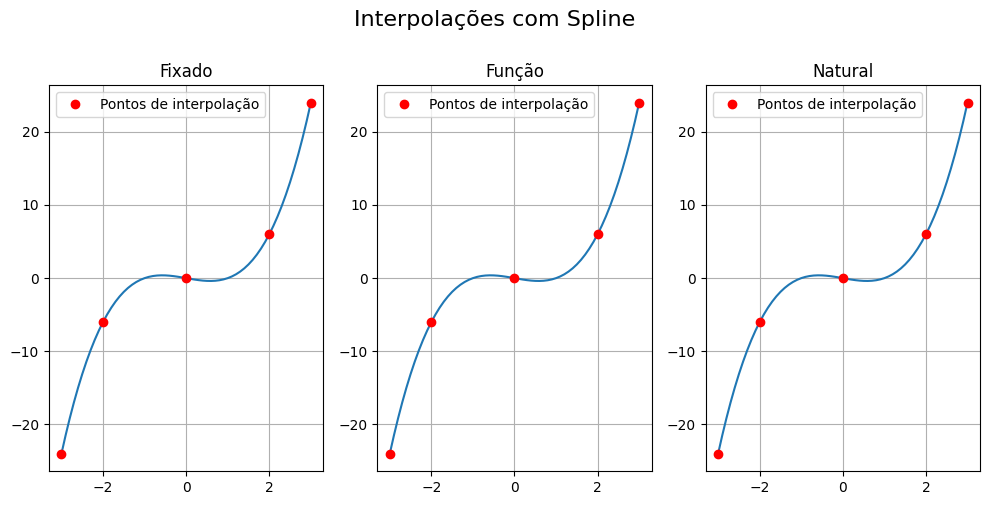

In [127]:
# Subgráficos
fig, axes = plt.subplots(1, 3, figsize=(10, 5))

# Spline Fixado
axes[0].plot(x, sc_1(x))
axes[0].plot(x_interpolacao, y_interpolacao, 'ro', label='Pontos de interpolação')
axes[0].set_title('Fixado')
axes[0].legend()
axes[0].grid()

# Função
axes[1].plot(x, f)
axes[1].plot(x_interpolacao, y_interpolacao, 'ro', label='Pontos de interpolação')
axes[1].set_title('Função')
axes[1].legend()
axes[1].grid()

# Spline  Natural
axes[2].plot(x, sc_2(x))
axes[2].plot(x_interpolacao, y_interpolacao, 'ro', label='Pontos de interpolação')
axes[2].set_title('Natural')
axes[2].legend()
axes[2].grid()

# Design do gráfico
plt.tight_layout() # Ajustar espaçamento
plt.suptitle('Interpolações com Spline', fontsize=16, y=1)
plt.subplots_adjust(top=0.85)  # Ajusta o espaço para o título
plt.show()

# Tratando a Spline como um módulo 

In [128]:
import Spline

In [129]:
# Pontos de interpolação
x_interpolacao = [-4,-2,0,3,6]
y_interpolacao = [-3,5,8,-7,1]

# Valores para teste
x = [i/10 for i in range(-60,61)]

In [130]:
# Criando instâncias de splines naturais
spline_01 = Spline.SplineCubica(x_interpolacao, y_interpolacao, 'natural')
spline_02 = Spline.SplineCubica(x_interpolacao, y_interpolacao, 'natural', [-10,10])
spline_03 = Spline.SplineCubica(x_interpolacao, y_interpolacao, 'natural', [10,-10])

In [131]:
# Criando instâncias de splines fixadas
spline_04 = Spline.SplineCubica(x_interpolacao, y_interpolacao, 'fixado')
spline_05 = Spline.SplineCubica(x_interpolacao, y_interpolacao, 'fixado', [-10,10])
spline_06 = Spline.SplineCubica(x_interpolacao, y_interpolacao, 'fixado', [10,-10])

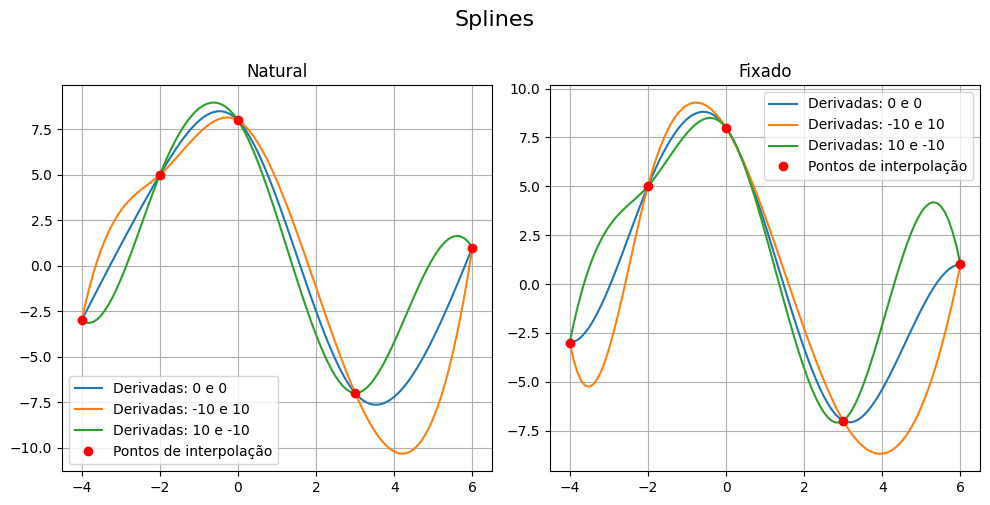

In [132]:
# Gerando o gráficos
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Splines Naturais
axes[0].plot(x, spline_01(x), label = 'Derivadas: 0 e 0')
axes[0].plot(x, spline_02(x), label = 'Derivadas: -10 e 10')
axes[0].plot(x, spline_03(x), label = 'Derivadas: 10 e -10')
axes[0].plot(x_interpolacao, y_interpolacao, 'ro', label='Pontos de interpolação')
axes[0].set_title('Natural')
axes[0].legend()
axes[0].grid()

# Splines Fixadas
axes[1].plot(x, spline_04(x), label = 'Derivadas: 0 e 0')
axes[1].plot(x, spline_05(x), label = 'Derivadas: -10 e 10')
axes[1].plot(x, spline_06(x), label = 'Derivadas: 10 e -10')
axes[1].plot(x_interpolacao, y_interpolacao, 'ro', label='Pontos de interpolação')
axes[1].set_title('Fixado')
axes[1].legend()
axes[1].grid()

# Design do gráfico
plt.tight_layout() # Ajustar espaçamento
plt.suptitle('Splines', fontsize=16, y=1)
plt.subplots_adjust(top=0.85)  # Ajusta o espaço para o título
plt.show()